In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jatin\AppData\Local\Temp\ipykernel_15964\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_Org = pd.read_csv('train.csv')
df = df_Org.copy()

In [3]:
df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

# EDA , Feature Engineering

array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'numberOfRooms'}>,
        <Axes: title={'center': 'hasYard'}>,
        <Axes: title={'center': 'hasPool'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'cityCode'}>,
        <Axes: title={'center': 'cityPartRange'}>,
        <Axes: title={'center': 'numPrevOwners'}>],
       [<Axes: title={'center': 'made'}>,
        <Axes: title={'center': 'isNewBuilt'}>,
        <Axes: title={'center': 'hasStormProtector'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'attic'}>,
        <Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'hasStorageRoom'}>,
        <Axes: title={'center': 'hasGuestRoom'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

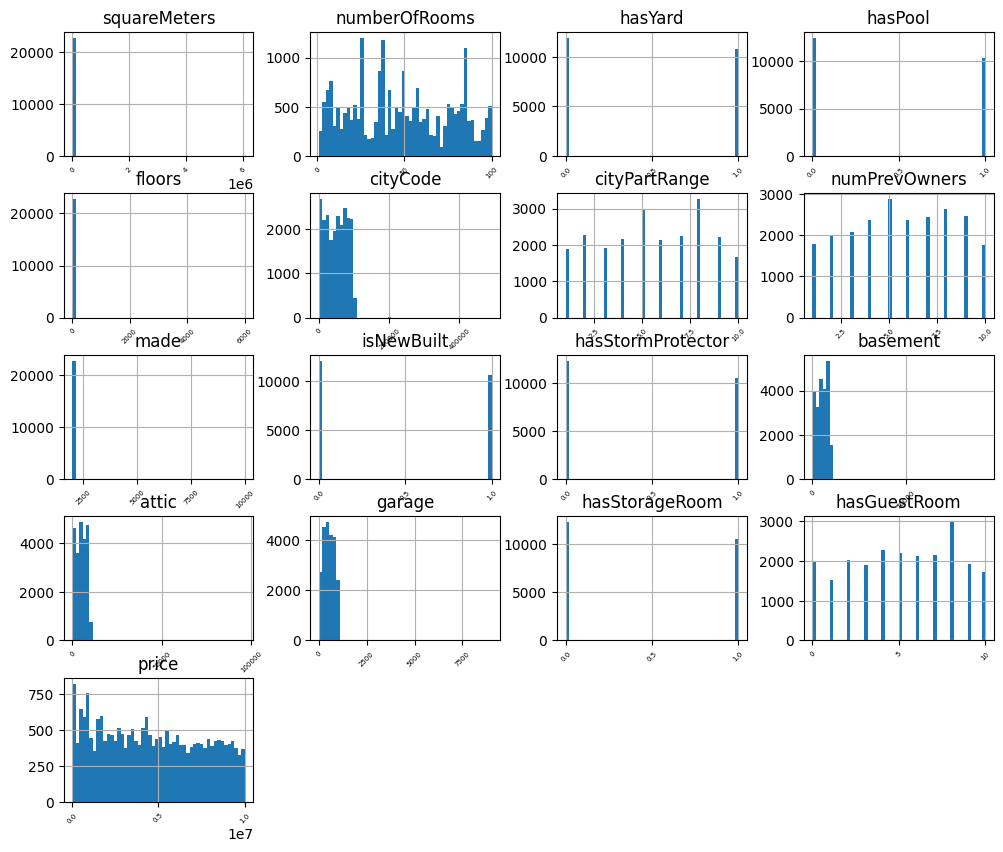

In [5]:
df.drop('id', axis=1).hist(bins=50, figsize=(12, 10), xlabelsize=5, xrot=45)

In [6]:
def label(X):
    if X == 1:
        return True
    elif X == 0:
        return False
    else:
        return 'Uknown'
for x in ('hasYard', 'hasPool', 'isNewBuilt', 
          'hasStormProtector', 'hasStorageRoom'):
    df[x] = df[x].apply(label)

In [7]:
for x in ('hasYard', 'hasPool', 'isNewBuilt', 
          'hasStormProtector', 'hasStorageRoom'):
    print(df[x].value_counts())

hasYard
False    11913
True     10817
Name: count, dtype: int64
hasPool
False    12439
True     10291
Name: count, dtype: int64
isNewBuilt
False    12093
True     10637
Name: count, dtype: int64
hasStormProtector
False    12274
True     10456
Name: count, dtype: int64
hasStorageRoom
False    12236
True     10494
Name: count, dtype: int64


In [8]:
df['Room_Size'] = df['squareMeters'] / df['numberOfRooms']

In [9]:
df['numPrevOwners'].value_counts().sort_index()
owner_mapping = {
    1: 'New_1',
    2: 'New_2',
    3: 'New_3',
    4: 'New_4',
    5: 'New_5',
    6: 'New_6',
    7: 'New_7',
    8: 'New_8',
    9: 'New_9',
    10: 'New_10'
}

df['Prev_Cat'] = df['numPrevOwners'].map(owner_mapping)

# Here is some info about pincode/citycode-
The first digit of a PIN indicates the zone, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district.

In [10]:
df['cityCode'] = df['cityCode'].astype(str).str.zfill(5)
df['zone'] = df['cityCode'].str[0].astype(int)
df['sub_zone'] = df['cityCode'].str[1].astype(int)
df['sorting_district'] = df['cityCode'].str[:3].astype(int)
df['post_office'] = df['cityCode'].str[3:].astype(int)
df['cityCode'] = df['cityCode'].astype(int)

In [11]:
pd.set_option('display.max_columns', 50)
df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,Room_Size,Prev_Cat,zone,sub_zone,sorting_district,post_office
0,0,34291,24,True,False,47,35693,2,1,2000,False,True,8,5196,369,False,3,3436795.2,1428.791667,New_1,3,5,356,93
1,1,95145,60,False,True,60,34773,1,4,2000,False,True,729,4496,277,False,6,9519958.0,1585.750000,New_4,3,4,347,73
2,2,92661,45,True,True,62,45457,4,8,2020,True,True,7473,8953,245,True,9,9276448.1,2059.133333,New_8,4,5,454,57
3,3,97184,99,False,False,59,15113,1,1,2000,False,True,6424,8522,256,True,9,9725732.2,981.656566,New_1,1,5,151,13
4,4,61752,100,False,False,57,64245,8,4,2018,True,False,7151,2786,863,False,7,6181908.8,617.520000,New_4,6,4,642,45


In [12]:
df['made'].value_counts()

made
2000     3588
2003     1156
2014     1070
2015     1036
2007     1021
2008      981
2009      972
2019      956
2013      934
2018      927
2006      921
2004      915
2016      910
1996      822
2005      764
2017      741
1998      719
1993      651
1995      631
1994      628
2020      595
1997      592
1999      588
2010      152
2021      110
1990       77
2011       68
2001       59
1992       59
2012       51
1991       30
10000       5
2002        1
Name: count, dtype: int64

In [13]:
df.drop(df[df['made'] == 10000].index, inplace=True) # 10000 isn't making any sense

In [14]:
df['Age'] = df['made'].max() - df['made']

In [15]:
df['Age'].value_counts().sort_index()

Age
0      110
1      595
2      956
3      927
4      741
5      910
6     1036
7     1070
8      934
9       51
10      68
11     152
12     972
13     981
14    1021
15     921
16     764
17     915
18    1156
19       1
20      59
21    3588
22     588
23     719
24     592
25     822
26     631
27     628
28     651
29      59
30      30
31      77
Name: count, dtype: int64

<Axes: >

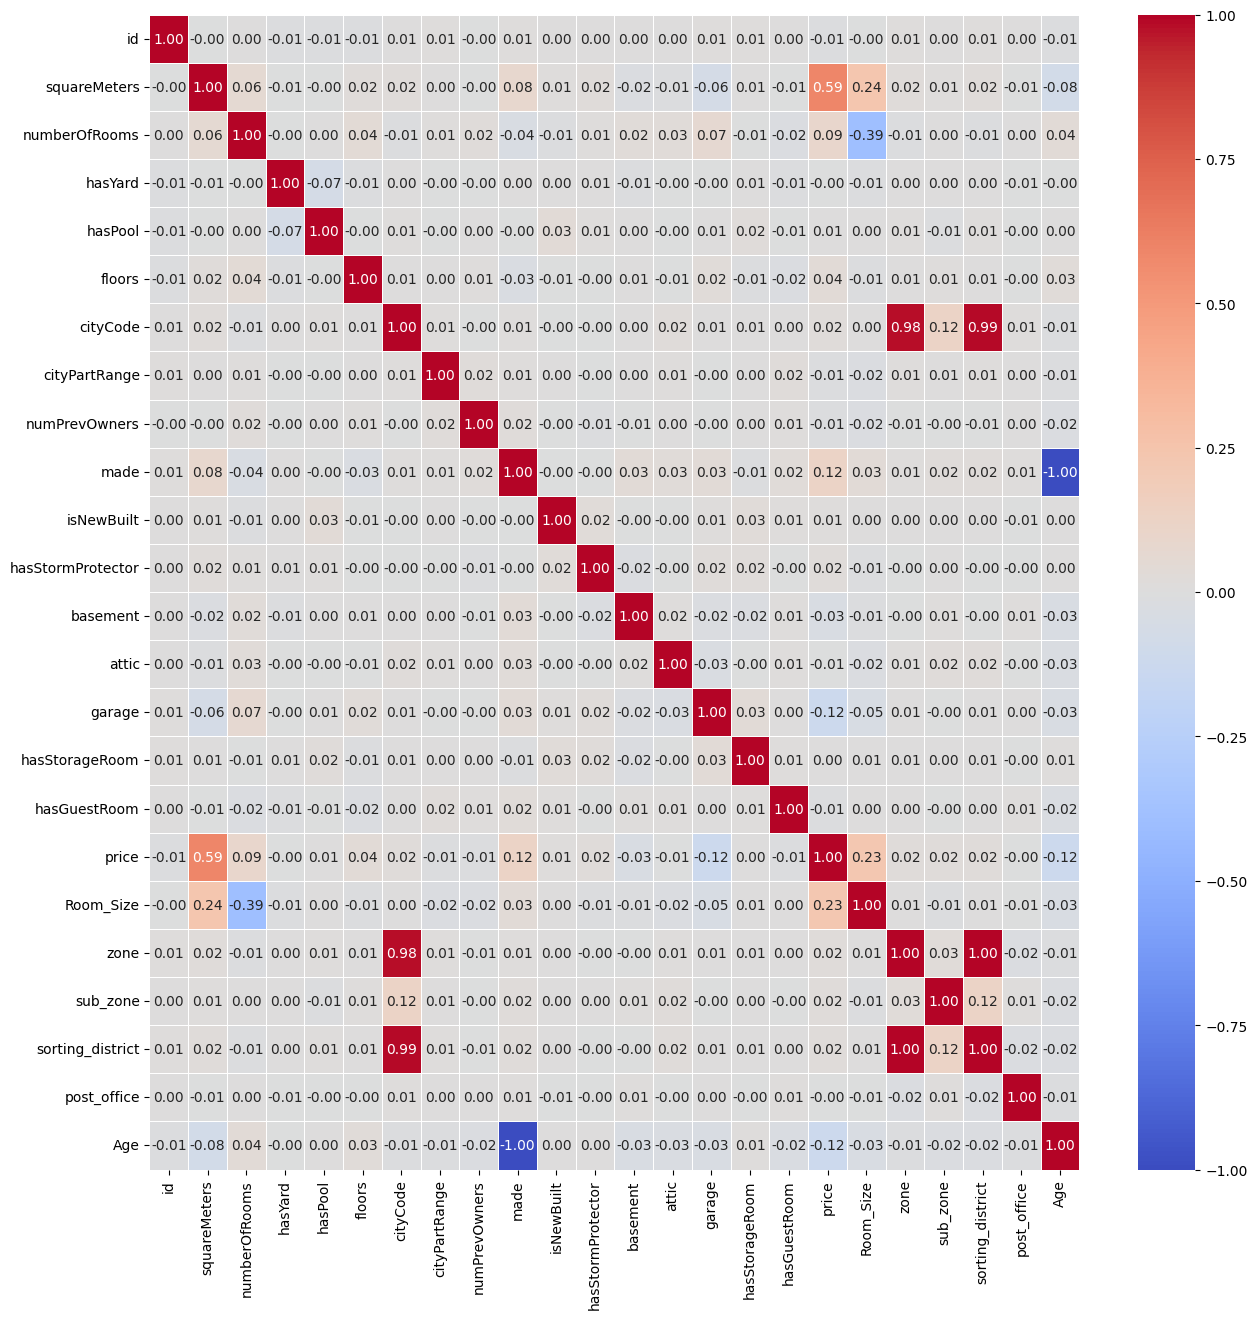

In [16]:
plt.figure(figsize=(15, 15)) 
Corr_Matrix = df.corr(numeric_only=True)
sns.heatmap(Corr_Matrix, annot=True, fmt=".2f", 
            cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)

# Preparing Train, Test sets

In [17]:
df = df_Org.copy() # Using original Data for doing all the preprocessing, I'm using df pls don't get confuse about it.
df.drop('id', axis=1, inplace=True)

In [18]:
def price_cat(X):
    if X >= df['price'].quantile(0.9):
        return 'high_1'
    elif X >= df['price'].quantile(0.8):
        return 'high'
    elif X >= df['price'].quantile(0.7):
        return 'mid'
    elif X >= df['price'].quantile(0.6):
        return 'low'
    elif X >= df['price'].quantile(0.5):
        return 'low_1'
    elif X >= df['price'].quantile(0.4):
        return 'low_2'
    elif X >= df['price'].quantile(0.3):
        return 'low_3'
    else:
        return 'lowest'
    
df['price_cat'] = df['price'].apply(price_cat)

<Axes: >

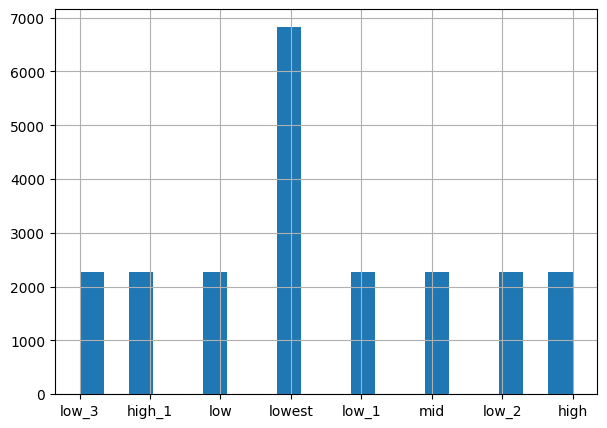

In [19]:
df['price_cat'].hist(bins=20, figsize=(7, 5))

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, stratify=df['price_cat'], shuffle=True)

In [21]:
for x in (train, test):
    x.drop('price_cat', axis=1, inplace=True)


train_X, train_y = train.drop(['price'], axis=1).copy(), train['price'].copy() 
test_X, test_y = test.drop(['price'], axis=1).copy(), test['price'].copy()

# Preprocessing

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


class LabelTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda col: col.map(lambda x: 1 if x else 0))

class RoomSizeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.assign(Room_Size=X['squareMeters'] / X['numberOfRooms'])

class OwnerMappingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        owner_mapping = {
            1: 'New_1',
            2: 'New_2',
            3: 'New_3',
            4: 'New_4',
            5: 'New_5',
            6: 'New_6',
            7: 'New_7',
            8: 'New_8',
            9: 'New_9',
            10: 'New_10'
        }
        return X.assign(Prev_Cat=X['numPrevOwners'].map(owner_mapping))

class CityCodeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['cityCode'] = X['cityCode'].astype(str).str.zfill(5)
        X['zone'] = X['cityCode'].str[0].astype(int)
        X['sub_zone'] = X['cityCode'].str[1].astype(int)
        X['sorting_district'] = X['cityCode'].str[:3].astype(int)
        X['post_office'] = X['cityCode'].str[3:].astype(int)
        X['cityCode'] = X['cityCode'].astype(int)
        return X

class AgeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.assign(Age=X['made'].max() - X['made'])

num_features = ['squareMeters', 'numberOfRooms', 'made']
cat_features = ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

owner_pipeline = Pipeline([
    ('owner_mapping', OwnerMappingTransformer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('label', LabelTransformer(), ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']),
    ('room_size', RoomSizeTransformer(), ['squareMeters', 'numberOfRooms']),
    ('owner', owner_pipeline, ['numPrevOwners']),
    ('city_code', CityCodeTransformer(), ['cityCode']),
    ('age', AgeTransformer(), ['made'])
])

Transformed Data

In [23]:
pd.DataFrame(preprocessing.fit_transform(train_X))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,-0.097743,1.307279,-0.018205,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,41439.0,85.0,487.517647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,99504.0,9.0,9.0,995.0,4.0,2006.0,7994.0
1,-0.646656,-1.428384,-0.063392,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,12130.0,8.0,1516.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4913.0,0.0,4.0,49.0,13.0,2000.0,8000.0
2,0.185188,0.880942,-0.063392,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,56546.0,73.0,774.602740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84708.0,8.0,4.0,847.0,8.0,2000.0,8000.0
3,0.871063,0.916470,-0.063392,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,93168.0,74.0,1259.027027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74343.0,7.0,4.0,743.0,43.0,2000.0,8000.0
4,0.541516,1.023054,-0.116110,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,75572.0,77.0,981.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83274.0,8.0,3.0,832.0,74.0,1993.0,8007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,-0.837649,1.449391,0.049575,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1932.0,89.0,21.707865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,92659.0,9.0,2.0,926.0,59.0,2015.0,7985.0
18180,-0.285402,0.987526,0.004388,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,31419.0,76.0,413.407895,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27481.0,2.0,7.0,274.0,81.0,2009.0,7991.0
18181,0.897058,0.703301,-0.063392,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,94556.0,68.0,1390.529412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56512.0,5.0,6.0,565.0,12.0,2000.0,8000.0
18182,0.131344,0.987526,0.064637,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,53671.0,76.0,706.197368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82909.0,8.0,2.0,829.0,9.0,2017.0,7983.0


# Training model

In [24]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
rand_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

rand_reg.fit(train_X, train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['squareMeters',
                                                   'numberOfRooms', 'made']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hasYard', 'hasPool...
                                                 ('room_size',
                                                  RoomSizeTransformer(),
                                                  ['squareMeters',
                                                   'numberOfRooms']),
                                                 ('owner',
                                                  Pipeline(steps=[('owner_mapping',
                                                                   OwnerMappingTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['numPrevOwners']),
                                                 ('city_code',
                                                  CityCodeTransformer(),
                                                  ['cityCode']),
                                                 ('age', AgeTransformer(),
                                                  ['made'])])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [25]:
from sklearn.model_selection import cross_val_score

-cross_val_score(rand_reg, train_X, train_y, scoring="neg_root_mean_squared_error", cv=3)

array([179458.31650109, 172942.8972326 , 172627.93421349])

# Testing model on test set

In [26]:
from sklearn.metrics import mean_squared_error
test_predictions = rand_reg.predict(test_X)
test_rmse = np.sqrt(mean_squared_error(test_y, test_predictions))

print(f"RMSE on test set: {test_rmse}")

RMSE on test set: 170365.34236865884


In [27]:
rand_reg.score(test_X, test_y)

0.996609196000507